# INCOME STATEMENT

Microsoft's Total Revenue, Gross Profit, and Net Income (in billions):
           Total Revenue Gross Profit Net Income
2021-06-30       168.088      115.856     61.271
2022-06-30        198.27       135.62     72.738
2023-06-30       211.915      146.052     72.361
2024-06-30       245.122      171.008     88.136


/var/folders/l1/d57p7wl95qx54rc4hcq45d1w0000gn/T/ipykernel_82278/3236462340.py:55: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=revenue_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')


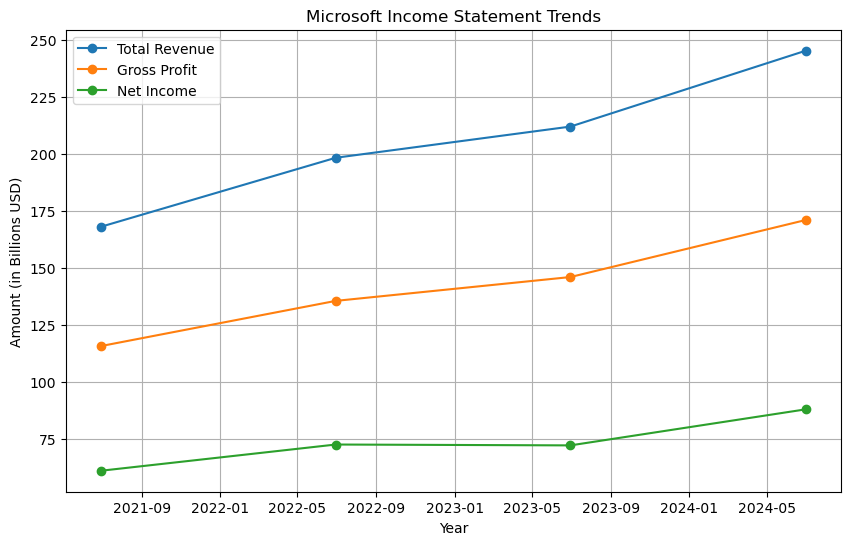


Predicted Total Revenue and Net Income for the Next 3 Years:
2025: Revenue = $278.22B, Net Income = $98.10B
2026: Revenue = $315.79B, Net Income = $110.80B
2027: Revenue = $358.43B, Net Income = $125.21B


/var/folders/l1/d57p7wl95qx54rc4hcq45d1w0000gn/T/ipykernel_82278/3236462340.py:86: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  growth_rate = df['Total Revenue'].pct_change().mean()


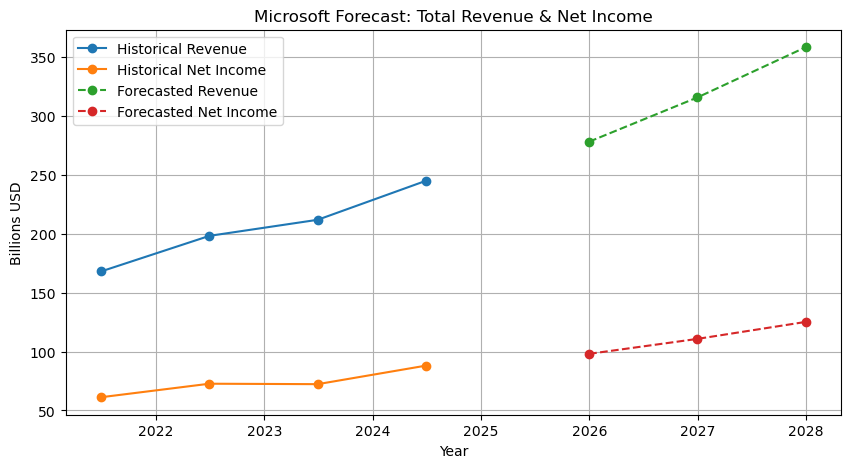

In [94]:
# import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fetch revenue data
symbol = 'MSFT'
apple = yf.Ticker(symbol)

# Get income statement data (focus on revenues)
income_statement = apple.financials
# Transpose for time-oriented view
income_df = income_statement.transpose()

# Select 3 income statement items
df = income_df[['Total Revenue', 'Gross Profit', 'Net Income']].dropna()

# Convert to billions
df = df / 1e9

# Sort index and convert to datetime
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Display Total Revenue, Gross Profit, and Net Income
print("Microsoft's Total Revenue, Gross Profit, and Net Income (in billions):")
print(df)

# Check for NaN values in revenue data
if revenue_data.isnull().any():
    print("\nWarning: NaN values detected in revenue data. Handling them...")
    revenue_data = revenue_data.dropna()  # Drop rows with NaN values
    # Alternatively, you could fill NaN values with the mean or median:
    # revenue_data = revenue_data.fillna(revenue_data.mean())

# Prepare data for regression
# Convert index to datetime for better handling
revenue_data.index = pd.to_datetime(revenue_data.index)
revenue_data = revenue_data.sort_index()

# Create a numerical index for regression
X = np.array(range(len(revenue_data))).reshape(-1, 1)  # Independent variable (time)
y = revenue_data.values  # Dependent variable (revenue)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future revenues (for the next 3 years)
future_X = np.array(range(len(revenue_data), len(revenue_data) + 3)).reshape(-1, 1)  # Next 3 years
predicted_revenue = model.predict(future_X)

# Combine historical and predicted revenues
future_dates = pd.date_range(start=revenue_data.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')
predicted_revenue_series = pd.Series(predicted_revenue, index=future_dates)

# Plot historical and predicted revenues
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(df.index, df['Gross Profit'], marker='o', label='Gross Profit')
plt.plot(df.index, df['Net Income'], marker='o', label='Net Income')
plt.title("Microsoft Income Statement Trends")
plt.xlabel("Year")
plt.ylabel("Amount (in Billions USD)")
plt.legend()
plt.grid(True)
plt.show()

# Print predicted Total Revenue, Gross Profit, and Net Income for the next 3 years
print("\nPredicted Total Revenue and Net Income for the Next 3 Years:")
for year, revenue, net in zip(future_years, future_revenue, predicted_net_income):
    print(f"{year}: Revenue = ${revenue:.2f}B, Net Income = ${net:.2f}B")

from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['Total Revenue']].values
y = df['Net Income'].values

model = LinearRegression()
model.fit(X, y)

# Predict net income for next 3 years using projected revenue growth
last_revenue = df['Total Revenue'].iloc[-1]
growth_rate = df['Total Revenue'].pct_change().mean()
future_revenue = [last_revenue * (1 + growth_rate) ** i for i in range(1, 4)]
predicted_net_income = model.predict(np.array(future_revenue).reshape(-1, 1))

# Plot future forecast
future_dates = pd.to_datetime([f"{y}-12-31" for y in future_years])
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Total Revenue'], label='Historical Revenue', marker='o')
plt.plot(df.index, df['Net Income'], label='Historical Net Income', marker='o')
plt.plot(future_dates, future_revenue, label='Forecasted Revenue', marker='o', linestyle='--')
plt.plot(future_dates, predicted_net_income, label='Forecasted Net Income', marker='o', linestyle='--')
plt.title("Microsoft Forecast: Total Revenue & Net Income")
plt.xlabel("Year")
plt.ylabel("Billions USD")
plt.legend()
plt.grid()
plt.show()

# BALANCE SHEET

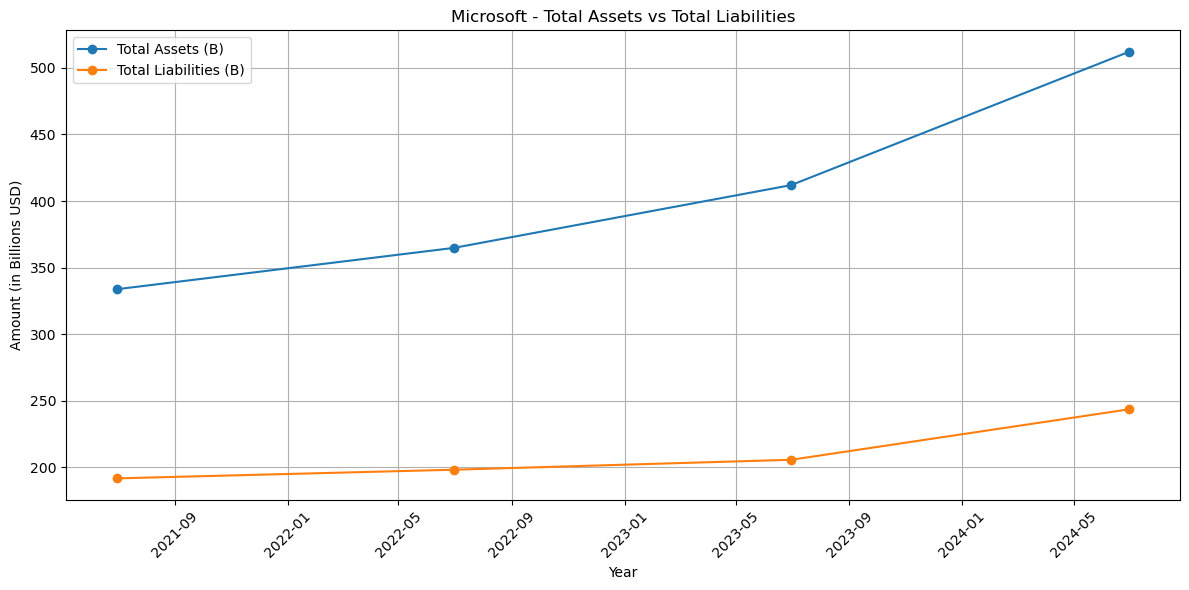

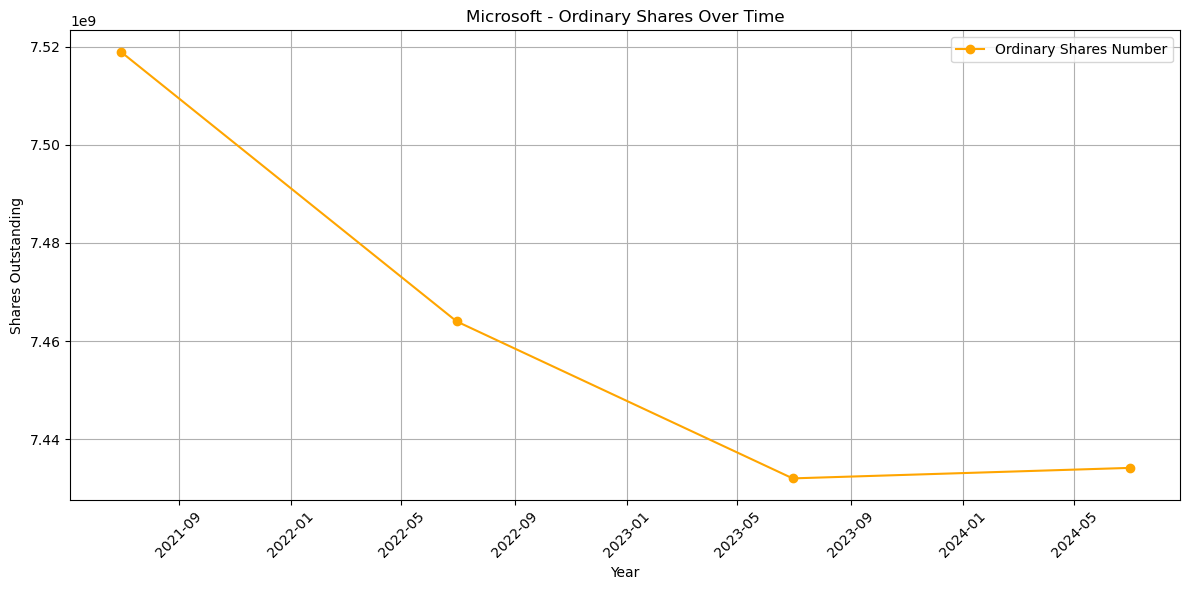

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol
ticker_symbol = 'MSFT'
microsoft = yf.Ticker(ticker_symbol)

# Get balance sheet and transpose
balance_sheet = microsoft.balance_sheet.transpose()

# Select 3 key items
important_items = ['Total Assets', 'Total Liabilities Net Minority Interest', 'Ordinary Shares Number']
selected_data = balance_sheet[important_items].copy()
selected_data.index = pd.to_datetime(selected_data.index)

# Convert currency values to billions for readability
selected_data[['Total Assets', 'Total Liabilities Net Minority Interest']] = selected_data[['Total Assets', 'Total Liabilities Net Minority Interest']] / 1e9

# Plot Total Assets and Total Liabilities
plt.figure(figsize=(12, 6))
plt.plot(selected_data.index, selected_data['Total Assets'], marker='o', label='Total Assets (B)')
plt.plot(selected_data.index, selected_data['Total Liabilities Net Minority Interest'], marker='o', label='Total Liabilities (B)')
plt.title(f'Microsoft - Total Assets vs Total Liabilities')
plt.xlabel('Year')
plt.ylabel('Amount (in Billions USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Ordinary Shares Number
plt.figure(figsize=(12, 6))
plt.plot(selected_data.index, selected_data['Ordinary Shares Number'], marker='o', color='orange', label='Ordinary Shares Number')
plt.title(f'Microsoft - Ordinary Shares Over Time')
plt.xlabel('Year')
plt.ylabel('Shares Outstanding')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FINANCIAL RATIOS

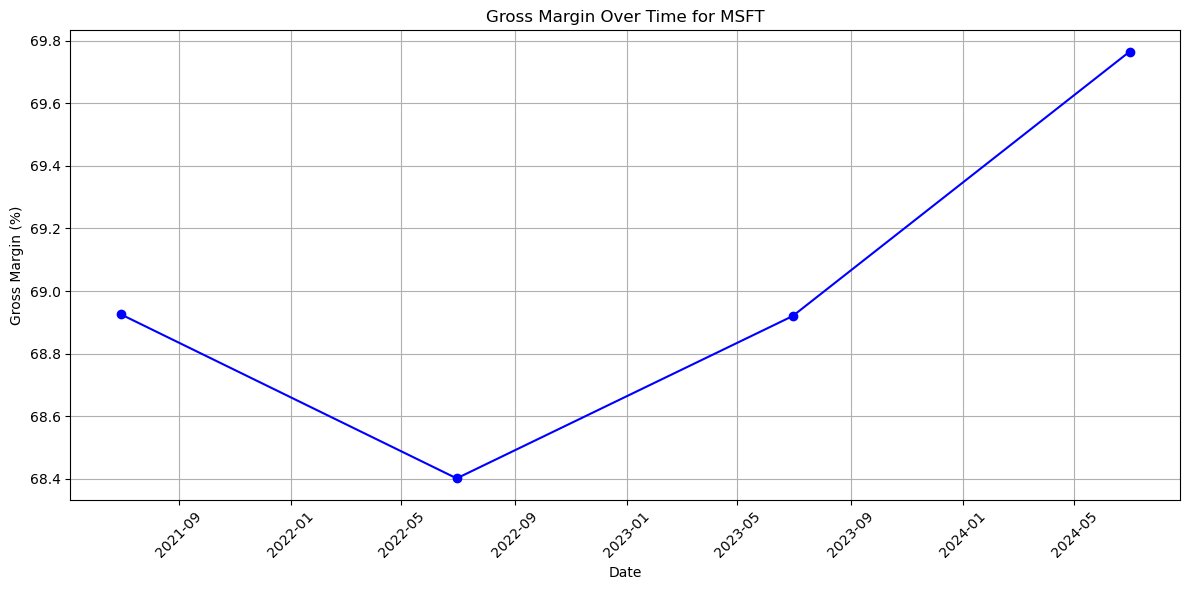

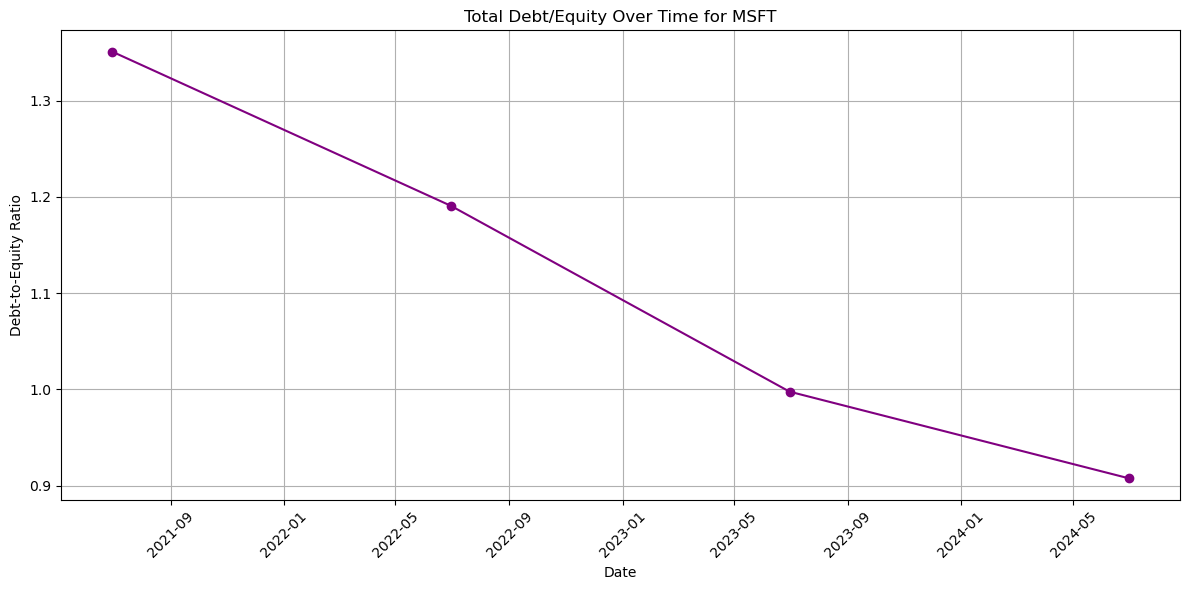

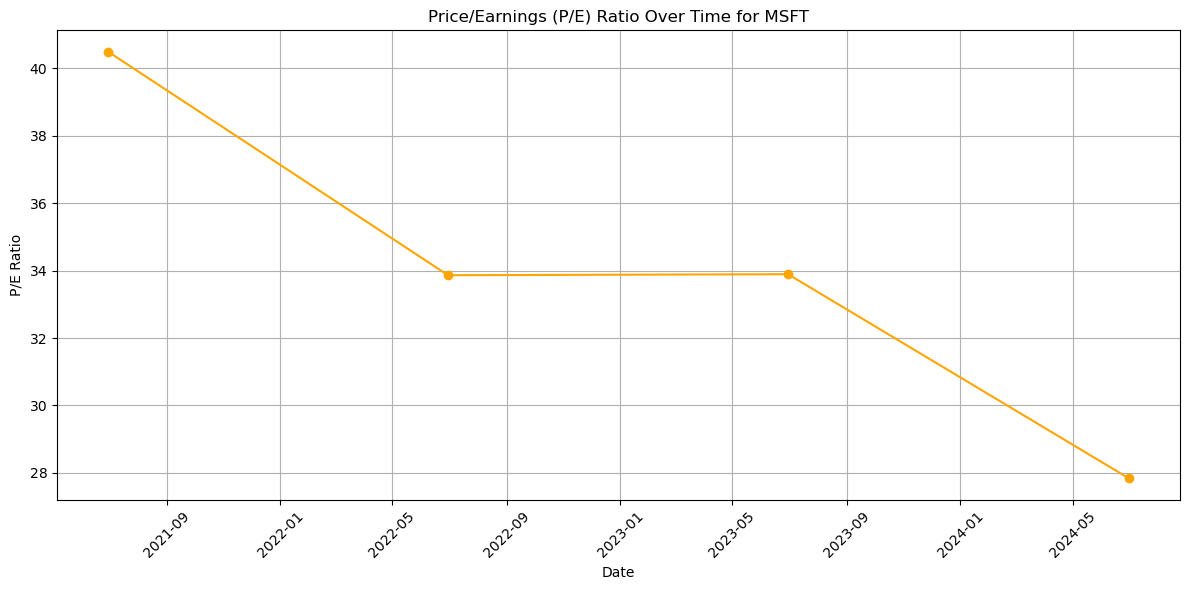

In [98]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker symbol for Microsoft
ticker_symbol = 'MSFT'
msft = yf.Ticker(ticker_symbol)

# Get financial statements
balance_sheet = msft.balance_sheet.transpose()
income_statement = msft.financials.transpose()

# Convert index to datetime
balance_sheet.index = pd.to_datetime(balance_sheet.index)
income_statement.index = pd.to_datetime(income_statement.index)

# Extract financial items
total_assets = balance_sheet['Total Assets']
total_liabilities = balance_sheet['Total Liabilities Net Minority Interest']
shareholder_equity = total_assets - total_liabilities

net_income = income_statement['Net Income']
ordinary_shares = balance_sheet['Ordinary Shares Number']
revenue = income_statement['Total Revenue']
gross_profit = income_statement['Gross Profit']

# New Ratios
gross_margin = (gross_profit / revenue) * 100  # convert to percentage
tdebt_tequity = total_liabilities / shareholder_equity
eps = net_income / ordinary_shares

# Assume price per share is constant for illustrative P/E ratio (normally you’d get from market data)
# Let's say MSFT price is ~$330 (as of April 2025)
price_per_share = 330
price_earnings = price_per_share / eps

# Create a DataFrame for metrics
metrics = pd.DataFrame({
    'Gross Margin (%)': gross_margin,
    'Total Debt/Equity': tdebt_tequity,
    'Price/Earnings': price_earnings
})

# --- Plotting ---

# Plot Gross Margin
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Gross Margin (%)'], marker='o', color='blue')
plt.title(f'Gross Margin Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Gross Margin (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("gross_margin.png")
plt.show()

# Plot Total Debt/Equity
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Total Debt/Equity'], marker='o', color='purple')
plt.title(f'Total Debt/Equity Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('Debt-to-Equity Ratio')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("debt_equity.png")
plt.show()

# Plot Price/Earnings Ratio
plt.figure(figsize=(12, 6))
plt.plot(metrics.index, metrics['Price/Earnings'], marker='o', color='orange')
plt.title(f'Price/Earnings (P/E) Ratio Over Time for {ticker_symbol}')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("pe_ratio.png")
plt.show()

# FINANCIAL ANALYSIS OF FACTSET DATA

In [101]:
# download the estimates history and ratio analysis from Factset. You may want to use Python 3.9.6
# I rename the Excel of estimates history as "EPSestimates", and the file of ratio analysis as "Ratios"
!pip install openpyxl
import pandas as pd

# Load Excel file, skipping the first 7 rows and using row 8 as header
df = pd.read_excel("/Users/belleschall/Desktop/ratio analysis.xlsx", skiprows=7)

# Transpose the data
df_transposed = df.transpose()

# Set first row as new headers
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]

# Reset index to make the transposed index (original column headers) into a column
df_transposed = df_transposed.reset_index()

# Rename the first column to 'Date' — this is the old index
df_transposed.rename(columns={df_transposed.columns[0]: 'Date'}, inplace=True)

print(df_transposed['Date'].unique())

["DEC '24" "SEP '24" "JUN '24" "MAR '24" "DEC '23" "SEP '23" "JUN '23"
 "MAR '23" "DEC '22" "SEP '22"]


In [103]:
# Clean and normalize the date strings
df_transposed['Date'] = (
    df_transposed['Date']
    .astype(str)
    .str.strip()
    .str.replace(r"[’‘`]", "'", regex=True)
    .str.upper()
)

# Convert from "DEC '24" to datetime
df_transposed['Date'] = pd.to_datetime(df_transposed['Date'], format="%b '%y", errors='coerce')

# Sort by date
df_transposed = df_transposed.sort_values(by='Date')
# Drop columns with missing values
df_transposed = df_transposed.dropna(axis=1, how='all')

# Preview the result
print(df_transposed.head())

Unnamed: 0       Date  NaN Gross Margin SG&A to Sales Operating Margin  \
9          2022-09-01  LTM    68.260002     26.569494        41.690508   
8          2022-12-01  LTM     68.15977     26.994914        41.164855   
7          2023-03-01  LTM    68.449018     27.019958         41.42906   
6          2023-06-01  LTM    68.920086      26.58094        42.339145   
5          2023-09-01  LTM    69.441162     25.879254        43.561907   

Unnamed: 0 Pretax Margin Net Margin Free Cash Flow Margin  \
9              41.740244  34.366121             31.187492   
8              40.465668  33.048007              29.21105   
7                40.9801   33.24807             27.653415   
6              42.144728  34.146238             28.065498   
5              43.526636  35.314919             28.961568   

Unnamed: 0 Free Cash Flow Conversion Ratio Capex To Sales  ... CFO/Total Debt  \
9                                64.170571      11.995076  ...       1.136862   
8                         

In [105]:
#import estimates
import pandas as pd

# Load the Excel file "EPSestimates", skipping the first 2 rows and using the third row as header
df_eps = pd.read_excel("/Users/belleschall/Desktop/EPS.xlsx", skiprows=2)

# Convert the "Date" column with the format "07 Apr '25" to datetime
df_eps['Date'] = pd.to_datetime(df_eps['Date'], format="%d %b '%y", errors='coerce')

# Sort by date
df_eps = df_eps.sort_values(by='Date')

# Rename the column 'Mean' to 'EPS estimate'
df_eps = df_eps.rename(columns={'Mean': 'EPS estimate'})

# View the first few rows after conversion
print(df_eps.head())

         Date  EPS estimate  Num of Est  Num Up  Num Down     Low     High  \
24 2023-04-28       3.07292          10       6         0  2.8687  3.59877   
23 2023-05-31       3.08117          10       6         0  2.8687  3.59877   
22 2023-06-30       3.08117          10       6         0  2.8687  3.59877   
21 2023-07-31       3.15033          20       6         3  2.9600  3.38000   
20 2023-08-31       3.12449          19       6         4  2.9600  3.38000   

     Std Dev   Chg (%)   Chg Amt  P/E (x)  PEG (x)  
24  0.216454  2.336830  0.070169  28.5571  2.34898  
23  0.219052  0.268490  0.008250  30.0794  2.40313  
22  0.219052  0.000000  0.000000  30.8640  2.46581  
21  0.132411  2.244610  0.069160  30.0526  2.32522  
20  0.122721 -0.820029 -0.025834  29.0685  2.24999  


In [107]:
# Extract year and month from the 'Date' column of both DataFrames
df_eps['Year'] = df_eps['Date'].dt.year
df_eps['Month'] = df_eps['Date'].dt.month

df_transposed['Year'] = df_transposed['Date'].dt.year
df_transposed['Month'] = df_transposed['Date'].dt.month

# Merge the two DataFrames on Year and Month
merged_df = pd.merge(df_eps, df_transposed, on=['Year', 'Month'], how='inner')

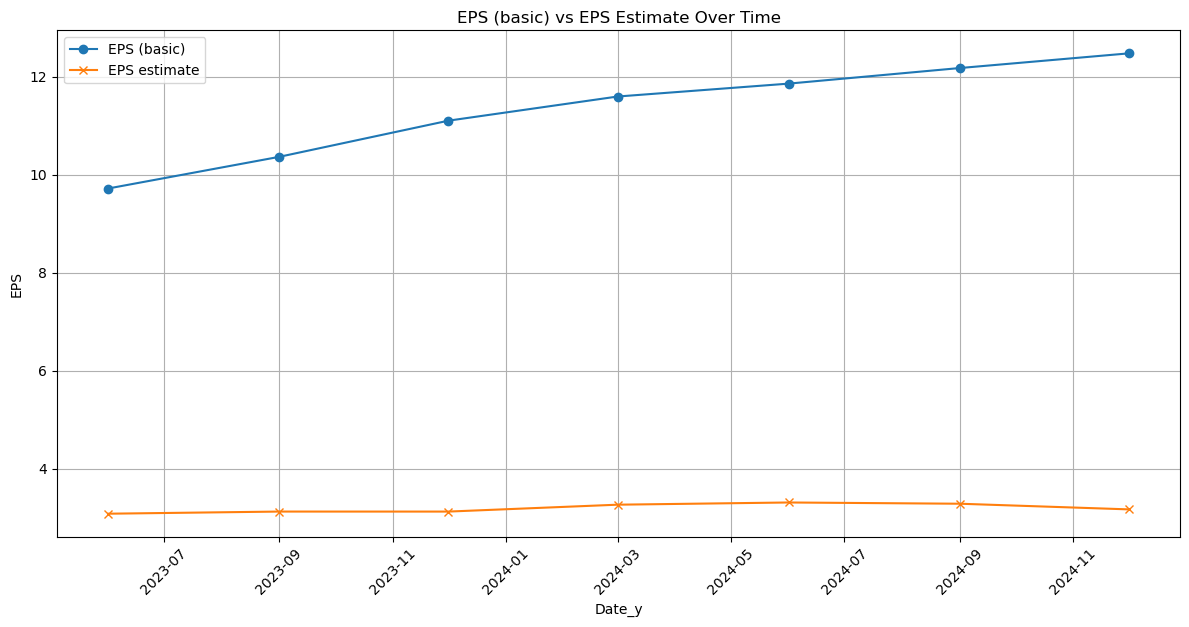

In [109]:
# Calculate the difference between actual EPS and estimated EPS
merged_df['EPS Difference'] = merged_df['EPS (basic)'] - merged_df['EPS estimate']

import matplotlib.pyplot as plt

# Sort by date for proper plotting
merged_df = merged_df.sort_values(by='Date_y')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date_y'], merged_df['EPS (basic)'], label='EPS (basic)', marker='o')
plt.plot(merged_df['Date_y'], merged_df['EPS estimate'], label='EPS estimate', marker='x')
plt.xlabel('Date_y')
plt.ylabel('EPS')
plt.title('EPS (basic) vs EPS Estimate Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

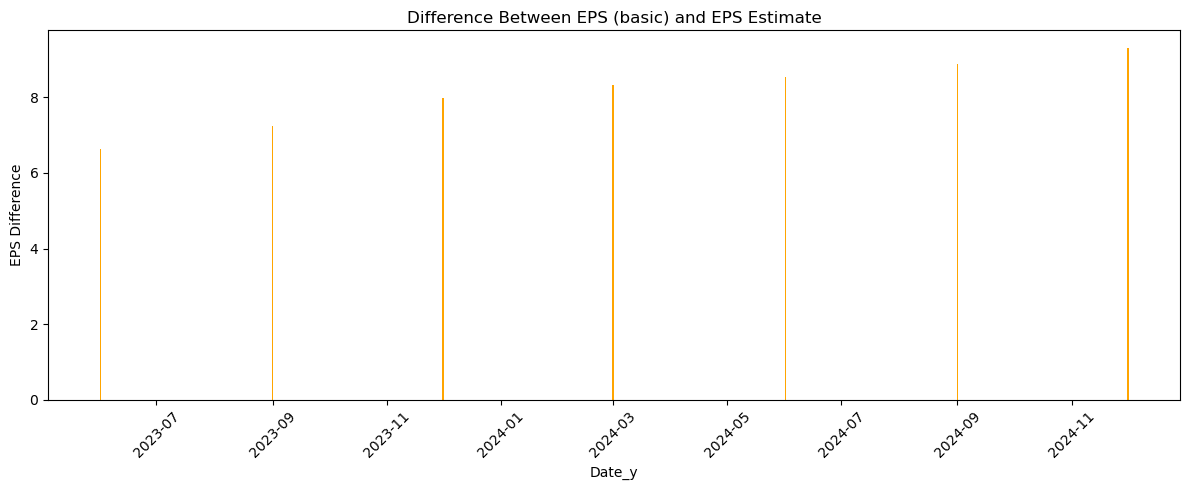

In [111]:
plt.figure(figsize=(12, 5))
plt.bar(merged_df['Date_y'], merged_df['EPS Difference'], color='orange')
plt.xlabel('Date_y')
plt.ylabel('EPS Difference')
plt.title('Difference Between EPS (basic) and EPS Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

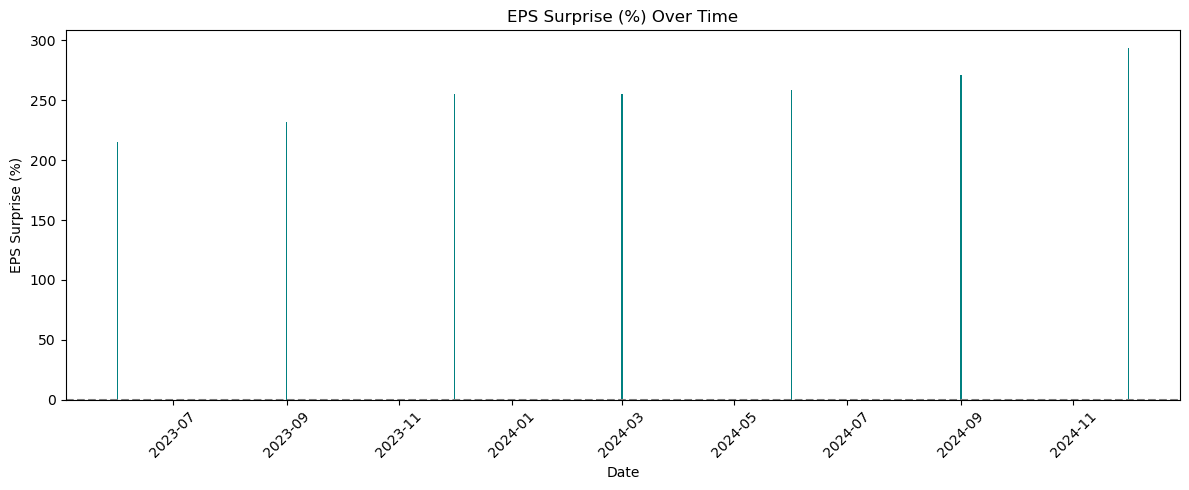

In [113]:
# Avoid division by zero by filtering out zero estimates
merged_df['EPS Surprise (%)'] = ((merged_df['EPS (basic)'] - merged_df['EPS estimate']) / merged_df['EPS estimate'].abs()) * 100
plt.figure(figsize=(12, 5))
plt.bar(merged_df['Date_y'], merged_df['EPS Surprise (%)'], color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title('EPS Surprise (%) Over Time')
plt.xlabel('Date')
plt.ylabel('EPS Surprise (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()